In [1]:
import pickle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append("..")
from hiora_cartpole import interruptibility
from vividict import Vividict
import saveloaddata
import stats_experiments
import stats_experiments as se

/home/erle/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
data_dir_p = "../data"

In [18]:
with open("../data/xss.pickle", 'rb') as f:
    xss = pickle.load(f)
    
with open("../data/xss-2.pickle", 'rb') as f:
    xss2 = pickle.load(f)
    
    
xsssi = xss['Sarsa']['uninterrupted'] + xss2['Sarsa']['uninterrupted'] 

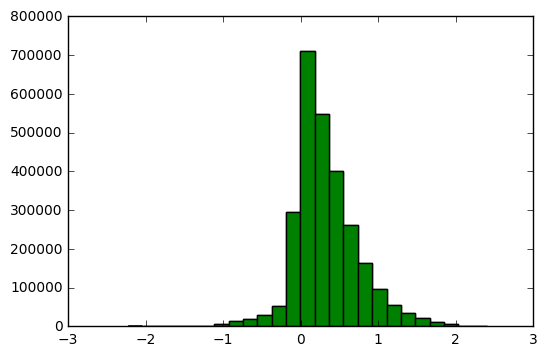

In [10]:
plt.hist(np.hstack(xss['Sarsa']['uninterrupted']), bins=25)
plt.show()

In [35]:
len(xss['Sarsa']['uninterrupted'])

hist_per_run = np.array([np.histogram(xs, bins=20, range=(-2.4, 2.4))[0]
                         for xs in xsssi])
cum_hist = np.cumsum(hist_per_run, axis=0)

In [26]:
hist_per_run.shape

(32, 20)

Note: http://matplotlib.org/examples/mplot3d/hist3d_demo.html

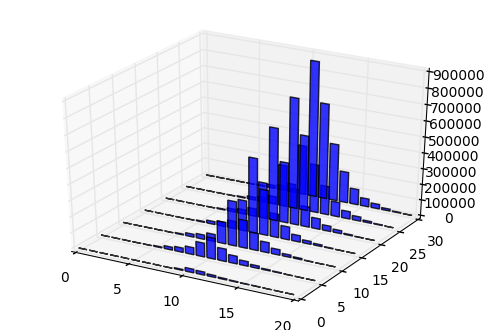

In [36]:
# Credits: http://stackoverflow.com/a/35225919/5091738
ax = plt.figure().add_subplot(111, projection='3d')
for n_run in xrange( len(xsssi) ):
    if n_run % 5 == 0:
        ax.bar(xrange(20), hist2d[n_run], zs=n_run, zdir='y', 
               alpha=0.8)
    
plt.show()
    

In [40]:
x_count = sum(len(xs) for xs in xsssi)

In [41]:
x_count

2736483

In [42]:
all_xs = np.hstack(xsssi)

In [58]:
run_of_x = np.hstack([np.full(len(xs), n_run)
                     for n_run, xs in enumerate(xsssi)])

In [51]:
run_of_x

array([ 0,  0,  0, ..., 31, 31, 31])

In [89]:
hist, x_edges, y_edges = np.histogram2d(all_xs, run_of_x, 
                                        bins=[51, len(xsssi) // 4])
hist = hist.T
cum_hist = np.cumsum(hist, axis=0)
norm_cum_hist = cum_hist / np.sum(cum_hist, axis=1)[:,None]

In [19]:
X, Y = np.meshgrid(x_edges, y_edges)
plt.pcolormesh(X, Y, norm_cum_hist)
plt.show()

NameError: name 'x_edges' is not defined

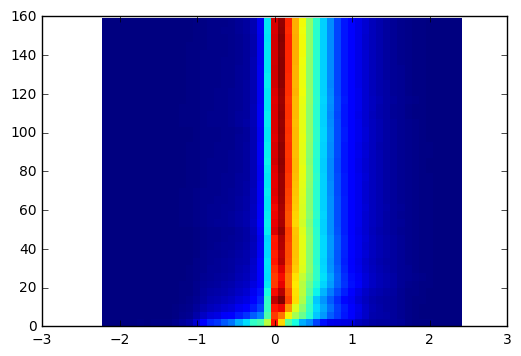

In [21]:
stats_experiments.plot_cum_hist_devel(xsssi)
plt.show()

xs mean: 0.220474021667, std: 0.295093656369


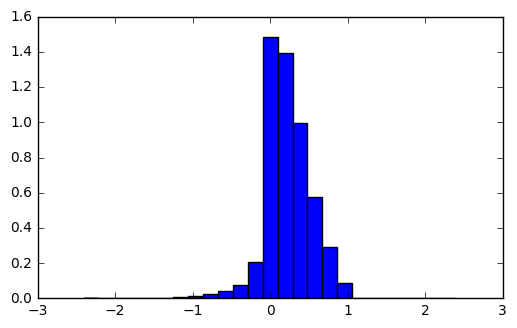

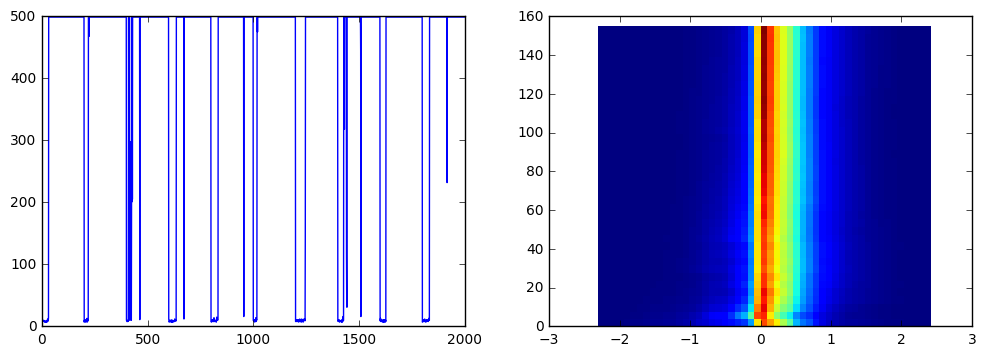

In [48]:
sarsa_comp_fig = plt.figure(figsize=(6, 8))
with saveloaddata.load_res('Sarsa', 'uninterrupted', data_dir_p) as res:
    plt.show( stats_experiments.all_in_one(*res, inter_comp_ax=sarsa_comp_fig.add_subplot(211)) )

xs mean: 0.059714046071, std: 0.203415361661


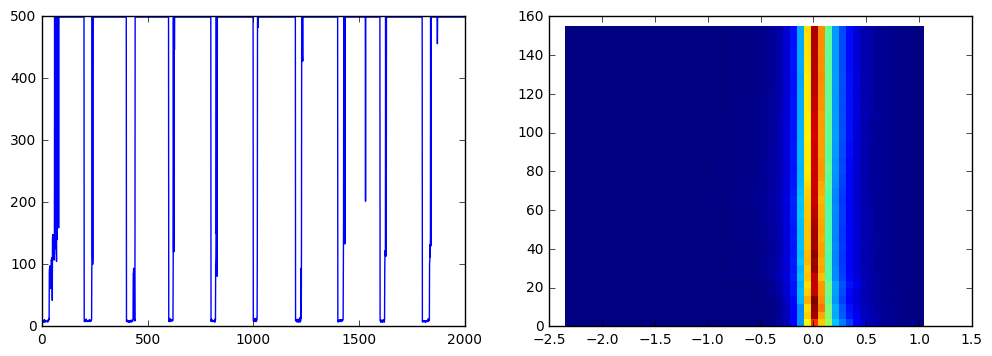

In [49]:
with saveloaddata.load_res('Sarsa', 'interrupted', data_dir_p) as res:
    plt.show( stats_experiments.all_in_one(*res, inter_comp_ax=sarsa_comp_fig.add_subplot(212)) )

In [50]:
plt.show(sarsa_comp_fig)

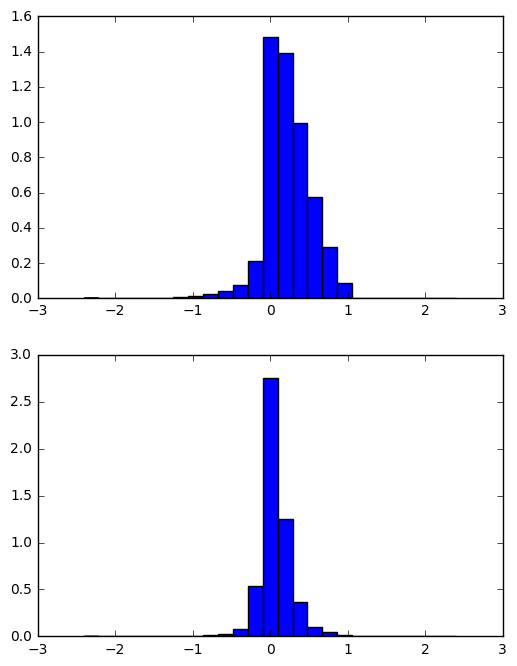

In [51]:
sarsa_comp_fig

156
xs mean: 0.160870861811, std: 0.363812337941


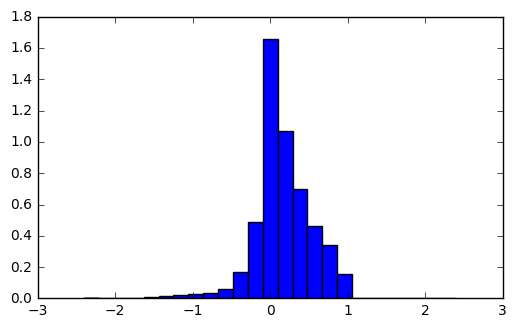

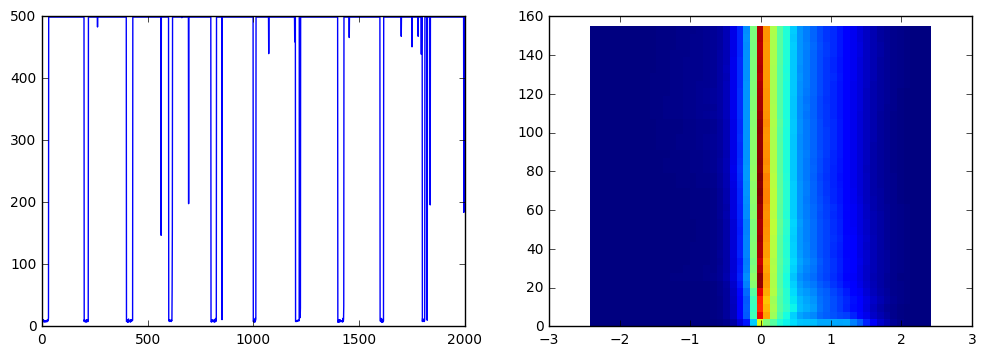

In [52]:
q_comp_fig = plt.figure(figsize=(6, 8))
with saveloaddata.load_res('Q-learning', 'uninterrupted', data_dir_p) as res:
    print len(res[1])
    plt.show( stats_experiments.all_in_one(*res, inter_comp_ax=q_comp_fig.add_subplot(211)) )

xs mean: -0.00613243501076, std: 0.265093407941


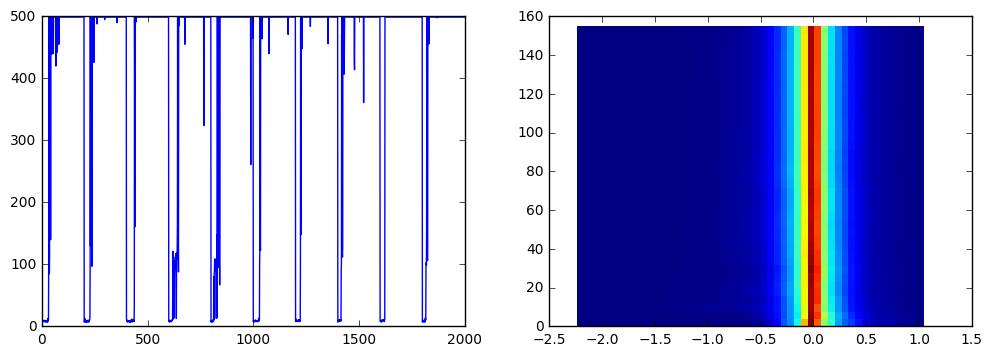

In [46]:
with saveloaddata.load_res('Q-learning', 'interrupted', data_dir_p) as res:
    plt.show( stats_experiments.all_in_one(*res, inter_comp_ax=q_comp_fig.add_subplot(212)) )

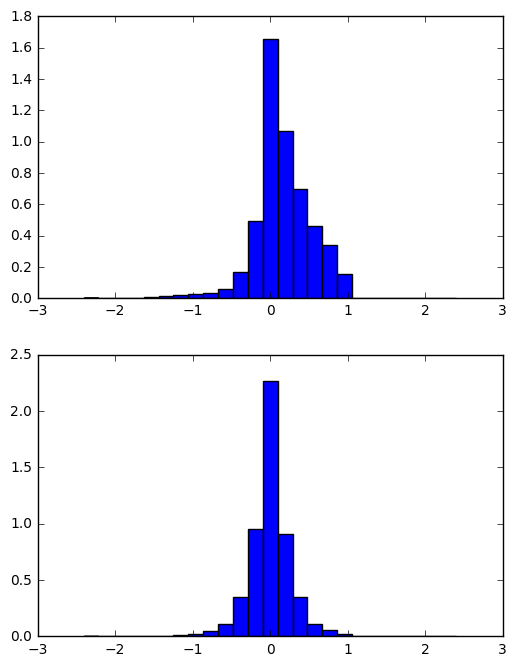

In [47]:
q_comp_fig

## Try out discounting

xs mean: 0.288764756027, std: 0.269868538659


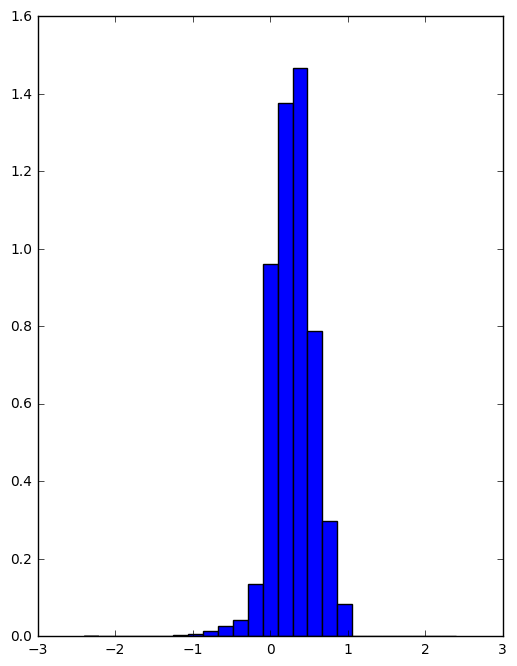

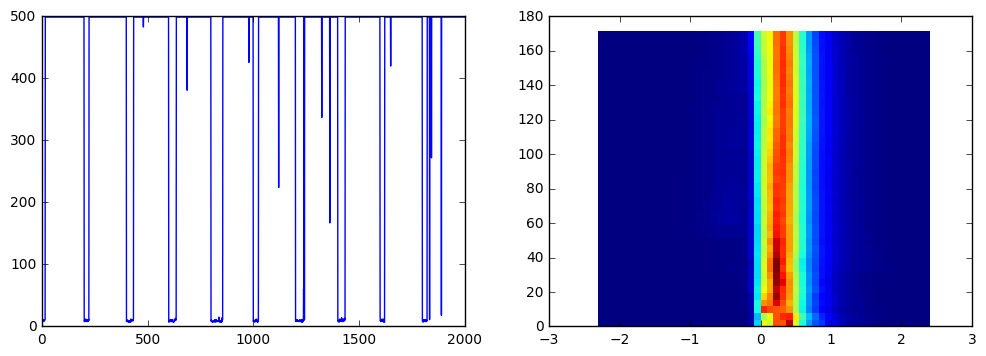

In [63]:
sarsa_disc_comp_fig = plt.figure(figsize=(6, 8))
with saveloaddata.load_res('Sarsa-disc', 'uninterrupted', data_dir_p) as res:
    plt.show( stats_experiments.all_in_one(*res, inter_comp_ax=sarsa_disc_comp_fig.add_subplot(111)) )

In [3]:
with saveloaddata.load_res('Sarsa-disc', 'uninterrupted', data_dir_p) as re:
    res = re

In [137]:
cube = interruptibility.rsxs2rsesxs(*res)

In [4]:
cube = interruptibility.rsxs2nparray(*res)

0


In [142]:
cube[0,0,0]

0

In [ ]:
np.pad(res[1][:10], (0, 500))

In [127]:
algo = 'Sarsa'
fig, ax_el, ax_devel, ax_comp = se.arrange_algo_full(algo)

In [128]:
se.plot_episode_lengths(res[0][:10], ax_el[0])

In [129]:
se.plot_xs_hist(np.hstack(res[1]), ax_comp[0])

In [130]:
se.plot_xs_hist(np.hstack(pruned_xss), ax_comp[1])

In [131]:
se.plot_xss_cum_hist_devel(res[1], ax_devel[0])

In [132]:
se.plot_xss_cum_hist_devel(pruned_xss, ax_devel[1])

In [135]:
np.mean(np.hstack(res[1])), np.mean(np.hstack(pruned_xss))

(0.34782721279192391, 0.34829627625115639)

In [136]:
np.std(np.hstack(res[1])), np.std(np.hstack(pruned_xss))

(0.33074252844160484, 0.33065079955974475)

Interesting. Cutting… Wait a minute. Was I again confused by my own nomenclature? Maybe. I cut out the first sixty/one-hundred time steps, but what I should have done was cut out the first sixty episodes of each run. Hmpf.

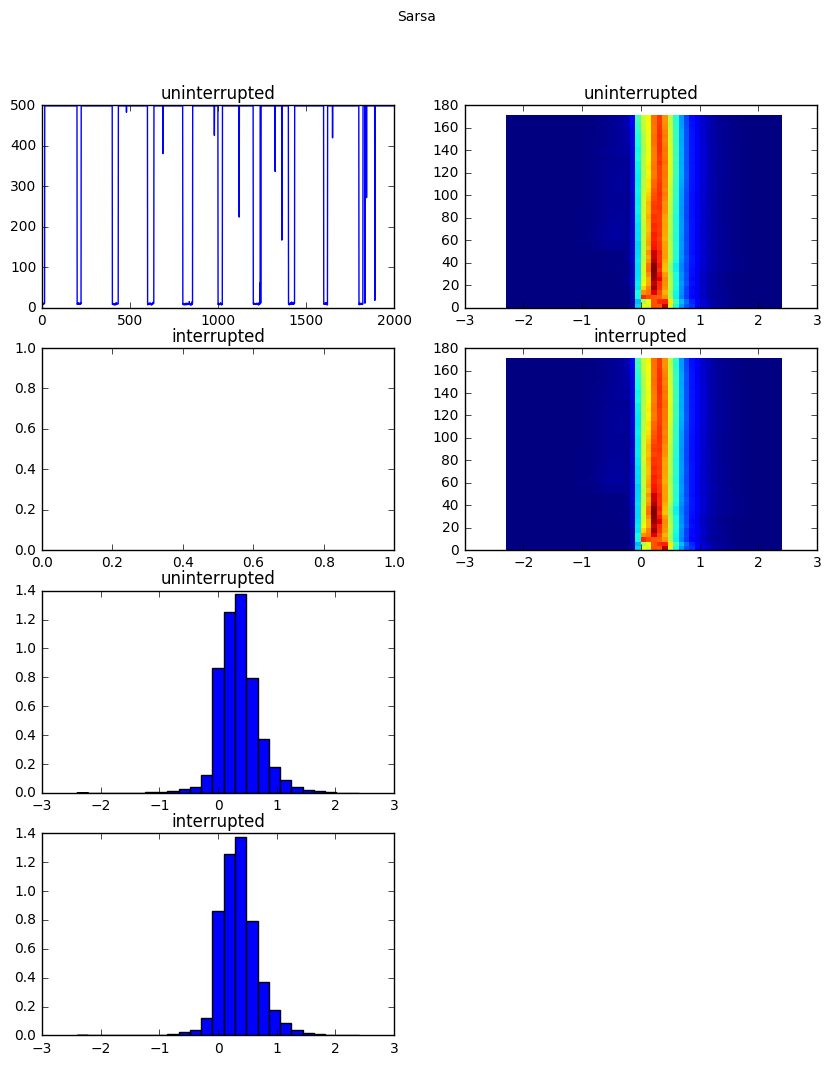

In [133]:
fig

In [54]:
p = '../data/Sarsa-disc-uninterrupted-xe-170221003432.pickle'
with open(p, 'rb') as f:
    res = pickle.load(f)
    
with open(p, 'wb') as f:
    pickle.dump(res[0:2], f)